In [39]:
# Import libraries
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from google.colab import files


In [40]:
# Step 2: Upload and unzip the dataset
zip_path = "/content/100_SKIN_IMG.zip"
extract_path = "/content/skin_data"

# Unzipping the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped!")


✅ Dataset unzipped!


In [41]:
# Define paths for train and validation data
train_path = "/content/skin_data/Split_smol/train"
val_path = "/content/skin_data/Split_smol/val"


In [42]:
# Set image size and batch size
img_size = (224, 224)
batch_size = 32

# Apply rescaling for normalization
datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_gen = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Validation data generator
val_gen = datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Print class labels and counts
class_labels = list(train_gen.class_indices.keys())
print("✅ Classes used for training:", class_labels)

# Show the number of samples per class
class_counts = Counter(train_gen.classes)
print("📊 Training image count per class:")
for class_idx, count in class_counts.items():
    label = class_labels[class_idx]
    print(f" - {label}: {count} images")


Found 697 images belonging to 9 classes.
Found 181 images belonging to 9 classes.
✅ Classes used for training: ['Actinic keratosis', 'Atopic Dermatitis', 'Benign keratosis', 'Dermatofibroma', 'Melanocytic nevus', 'Melanoma', 'Squamous cell carcinoma', 'Tinea Ringworm Candidiasis', 'Vascular lesion']
📊 Training image count per class:
 - Actinic keratosis: 80 images
 - Atopic Dermatitis: 81 images
 - Benign keratosis: 80 images
 - Dermatofibroma: 80 images
 - Melanocytic nevus: 80 images
 - Melanoma: 80 images
 - Squamous cell carcinoma: 80 images
 - Tinea Ringworm Candidiasis: 56 images
 - Vascular lesion: 80 images


In [43]:
# Define the CNN model with Dropout to prevent overfitting
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_labels), activation='softmax')  # Output layer with the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=10, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.1444 - loss: 2.5224 - val_accuracy: 0.2376 - val_loss: 2.0126
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.2305 - loss: 1.9022 - val_accuracy: 0.3149 - val_loss: 1.7231
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 83s 4s/step - accuracy: 0.3251 - loss: 1.7725 - val_accuracy: 0.3481 - val_loss: 1.6404
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 89s 4s/step - accuracy: 0.4942 - loss: 1.3539 - val_accuracy: 0.4807 - val_loss: 1.4000
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 87s 4s/step - accuracy: 0.5527 - loss: 1.1976 - val_accuracy: 0.4641 - val_loss: 1.4511
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.5784 - loss: 1.1458 - val_accuracy: 0.5414 - val_loss: 1.2746
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.6795 - loss: 0.8415 - val_accuracy: 0.5083 - val_loss: 1.5356
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6414 - loss: 1.0448 - val_accuracy: 0.5249 - val_loss

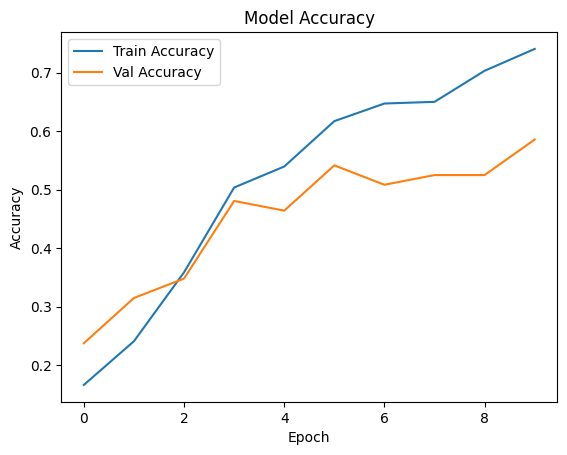

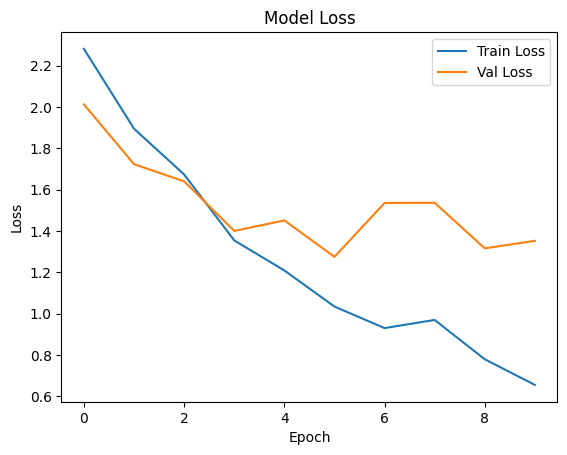

In [46]:
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot the loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


Saving download_D.jpg to download_D (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


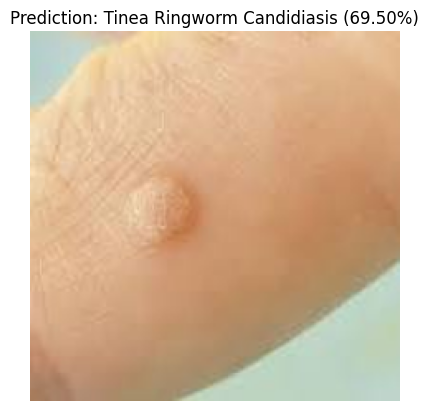


🩺 Predicted Disease: Tinea Ringworm Candidiasis
📊 Confidence: 69.50%


In [51]:
# Upload a new image for prediction
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Preprocess the image
img = Image.open(img_path).resize((224, 224))
img_array = tf.keras.utils.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict the class
pred = model.predict(img_array)
predicted_index = np.argmax(pred)
predicted_label = class_labels[predicted_index]
confidence = np.max(pred) * 100

# Display the uploaded image with the prediction
plt.imshow(img)
plt.axis('off')
plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
plt.show()

# Display the disease info (add more info per your dataset)
disease_info = {
    "Melanoma": " Deadliest form of skin cancer.",
    "Eczema": " Red, itchy, inflamed skin. Common in children.",
    "Psoriasis": " Red scaly patches. Autoimmune.",
    "Actinic keratosis": "Pre-cancerous rough, scaly patches.",
    "Basal cell carcinoma": " Common skin cancer, slow-growing.",
    "Healthy": " No disease detected."
}

# Display disease info
print(f"\n🩺 Predicted Disease: {predicted_label}")
print(f" Confidence: {confidence:.2f}%")

